# Creating a Junction Tree

Let's talk about the [Junction Tree Algorithm](https://en.wikipedia.org/wiki/Junction_tree_algorithm) `JTA`. We will follow the example of [Huang and Darwiche](http://pages.cs.wisc.edu/~dpage/ijar95.pdf). The ultimate goal of JTA is to transform a Bayesian Belief Network `BBN` into another structure, the Junction Tree `JT` such that we may perform probabilistic inference. In this notebook, we will not go into the full scope and depth of JTA, and instead, only visually cover how the directed acylic graph `DAG` of a BBN is transformed to a JT structurally (we will ignore how the parameters are transformed).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')

## Directed acylic graph (DAG)

Formally, a BBN is defined as a pair `G`, `P` where

* `G` is a DAG having vertices `V` and directed `E`,
  * a DAG is a graph with directed edges and there are no cycles (we cannot start at a node following the direction of the edges and find a path back to the starting node)
* `P` is a joint probability distribution $P(U)$ where each variable in $U$ has a one-to-one correspondence to the vertices in `V`, and
* satisfies the Markov condition, which states, a node is conditionally independence of its non-descendants given its parents.

In the Huang graph, we have 8 vertices or nodes labelled `A` through `H`.

In [2]:
g = nx.DiGraph()
for n in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
    g.add_node(n)

edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), 
         ('C', 'E'), ('D', 'F'), ('E', 'F'), 
         ('C', 'G'), ('E', 'H'), ('G', 'H')]
for pa, ch in edges:
    g.add_edge(pa, ch)

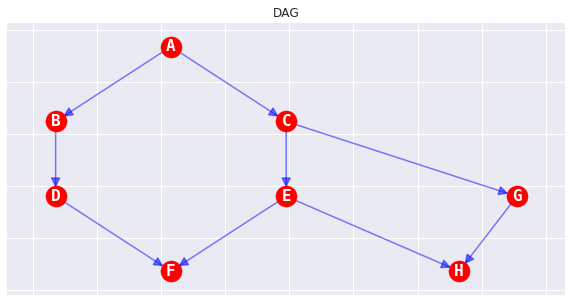

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))

pos = nx.nx_agraph.graphviz_layout(g, prog='dot', args='-Kdot')

params = {
    'node_color': 'r',
    'node_size': 450,
    'node_shape': 'o',
    'alpha': 1.0,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_nodes(g, **params)

params = {
    'font_size': 16,
    'font_color': 'w',
    'font_family': 'monospace',
    'font_weight': 'bold',
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_labels(g, **params)

params = {
    'width': 1.5,
    'alpha': 0.5,
    'edge_color': 'b',
    'arrowsize': 20,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_edges(g, **params)
_ = ax.set_title('DAG')

## Undirected graph

The first thing we need to do with the DAG is to convert all directed edges to undirected edges. 

In [4]:
u = g.to_undirected()

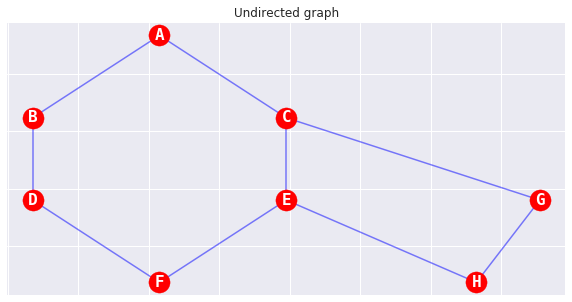

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

params = {
    'node_color': 'r',
    'node_size': 450,
    'node_shape': 'o',
    'alpha': 1.0,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_nodes(u, **params)

params = {
    'font_size': 16,
    'font_color': 'w',
    'font_family': 'monospace',
    'font_weight': 'bold',
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_labels(u, **params)

params = {
    'width': 1.5,
    'alpha': 0.5,
    'edge_color': 'b',
    'arrowsize': 20,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_edges(u, **params)
_ = ax.set_title('Undirected graph')

## Moralized graph

We then `moralize` the undirected graph. Moralization adds an undirected edge between the parents of a child if they are not already connected. Here, we add the edges `D-E` and `E-G`.

In [6]:
import copy

m = copy.deepcopy(u)

for n1, n2 in [('D', 'E'), ('E', 'G')]:
    m.add_edge(n1, n2)

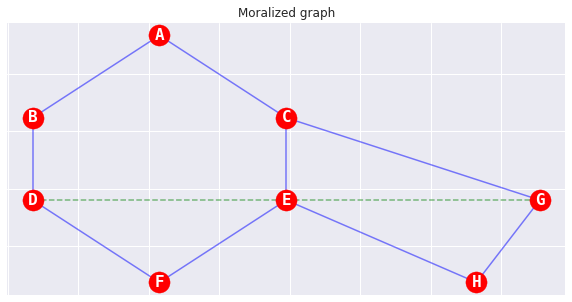

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))

params = {
    'node_color': 'r',
    'node_size': 450,
    'node_shape': 'o',
    'alpha': 1.0,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_nodes(m, **params)

params = {
    'font_size': 16,
    'font_color': 'w',
    'font_family': 'monospace',
    'font_weight': 'bold',
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_labels(m, **params)

params = {
    'edgelist': list(u.edges()),
    'width': 1.5,
    'alpha': 0.5,
    'edge_color': 'b',
    'arrowsize': 20,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_edges(m, **params)

params = {
    'edgelist': [e for e in m.edges() if not e in list(u.edges())],
    'width': 1.5,
    'alpha': 0.5,
    'edge_color': 'g',
    'arrowsize': 20,
    'style': 'dashed',
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_edges(m, **params)

_ = ax.set_title('Moralized graph')

## Triangulated graph

In trianguation, we add edges between non-adjacent nodes in every cycle length of four or more. As we triangulate, we also discover cliques. The triangulation process adds the arcs `A-D` and `A-E` and discovers the following cliques.

* EGH
* CEG
* DEF
* ACE
* ABD
* ADE

In [8]:
t = copy.deepcopy(m)

for n1, n2 in [('A', 'D'), ('A', 'E')]:
    t.add_edge(n1, n2)

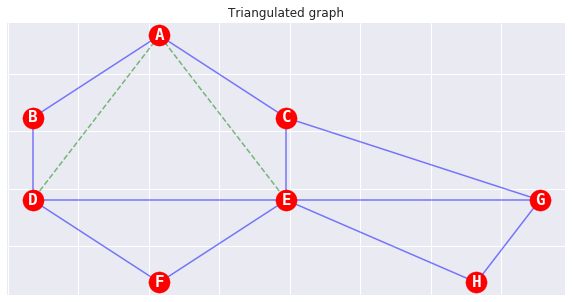

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

params = {
    'node_color': 'r',
    'node_size': 450,
    'node_shape': 'o',
    'alpha': 1.0,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_nodes(t, **params)

params = {
    'font_size': 16,
    'font_color': 'w',
    'font_family': 'monospace',
    'font_weight': 'bold',
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_labels(t, **params)

params = {
    'edgelist': list(m.edges()),
    'width': 1.5,
    'alpha': 0.5,
    'edge_color': 'b',
    'arrowsize': 20,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_edges(t, **params)

params = {
    'edgelist': [e for e in t.edges() if not e in list(m.edges())],
    'width': 1.5,
    'alpha': 0.5,
    'edge_color': 'g',
    'arrowsize': 20,
    'style': 'dashed',
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_edges(t, **params)

_ = ax.set_title('Triangulated graph')

## Junction tree

The cliques discovered through triangulation are then connected to each other through a separation set. Between two cliques, the separation set will have the intersection of variables of these cliques.

In [10]:
cliques = ['ABD', 'ADE', 'DEF', 'ACE', 'CEG', 'EGH']
sepsets = ['AD', 'DE', 'AE', 'CE', 'EG']
edges = [('ABD', 'AD'), ('AD', 'ADE'), ('ADE', 'DE'), ('DE', 'DEF'), 
         ('ADE', 'AE'), ('AE', 'ACE'), ('ACE', 'CE'), ('CE', 'CEG'), 
         ('CEG', 'EG'), ('EG', 'EGH')]

j = nx.Graph()

for n in cliques + sepsets:
    j.add_node(n)
    
for n1, n2 in edges:
    j.add_edge(n1, n2)

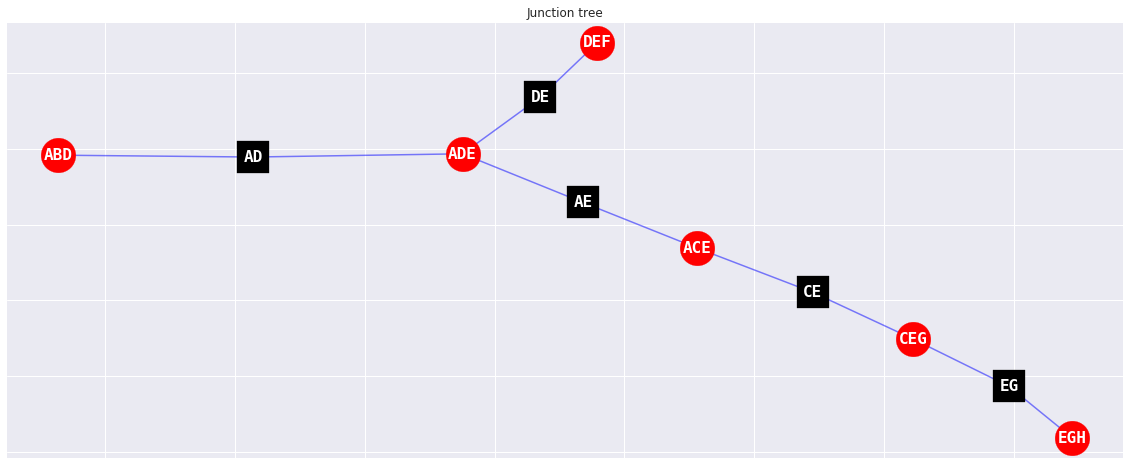

In [11]:
fig, ax = plt.subplots(figsize=(20, 8))

pos = nx.nx_agraph.graphviz_layout(j, prog='neato')

params = {
    'node_color': 'r',
    'node_size': 1200,
    'node_shape': 'o',
    'nodelist': cliques,
    'alpha': 1.0,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_nodes(j, **params)

params = {
    'node_color': 'k',
    'node_size': 1000,
    'node_shape': 's',
    'nodelist': sepsets,
    'alpha': 1.0,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_nodes(j, **params)

params = {
    'font_size': 16,
    'font_color': 'w',
    'font_family': 'monospace',
    'font_weight': 'bold',
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_labels(j, **params)

params = {
    'width': 1.5,
    'alpha': 0.5,
    'edge_color': 'b',
    'arrowsize': 20,
    'pos': pos,
    'ax': ax
}
_ = nx.drawing.nx_pylab.draw_networkx_edges(j, **params)
_ = ax.set_title('Junction tree')